# Analysis of air pollution
by Alex Sun

link to data https://data.wprdc.org/dataset/toxic-release-inventory/resource/2750b8c8-246b-430f-b1e0-1aa96e00b013

This data comes from Allegheny county and measures air pollution.

Air pollution is bad for cat health. Simple as.

The following cell will take a while to run; please be patient!

In [37]:
import fpsnippets
import pandas as pd

airPollutionCSV = pd.read_csv("airPollution.csv", index_col="_id")

query_mask = airPollutionCSV['CITY_NAME'] == "PITTSBURGH"

airPollutionPGH = airPollutionCSV[query_mask]

neighborhoodPollution = {}

for index, row in airPollutionPGH.iterrows():
    release_amount = row['TOTAL_RELEASE']
    if not pd.isna(release_amount):
        if isinstance(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']), list):
            if len(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE'])) != 0:
                adj_amount = release_amount / len(fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']))
                for neighborhood in fpsnippets.zip_to_neighborhoods(row['ZIP_CODE']):
                    if neighborhood in neighborhoodPollution:
                        neighborhoodPollution[neighborhood] += adj_amount
                    else:
                        neighborhoodPollution[neighborhood] = adj_amount

nghpolSeries = pd.Series(neighborhoodPollution)
nghpolSorted = nghpolSeries.sort_values(ascending=True)
print(nghpolSorted.head())

# The total amount (in pounds) of the toxic chemical released to air during the calendar year (January 1 - December 31). 
# Release amounts may be reported as specific numbers or as ranges (RELEASE_RANGE_CODE).

West Oakland                 45.736667
Terrace Village              45.736667
Upper Hill                   45.736667
Bedford Dwellings            45.736667
Central Business District    45.736667
dtype: float64


# oh yeah
The data comes sorted by zip code, which isn't exactly what we're looking for...

To get a rough idea of pollution by neighborhood, we assume that every source of pollution in a zip code is evenly distributed between the neighborhoods in that zip code.

The data themselves are measurements of lbs of air pollution released per year.

Let's take a look at the results.

<Axes: >

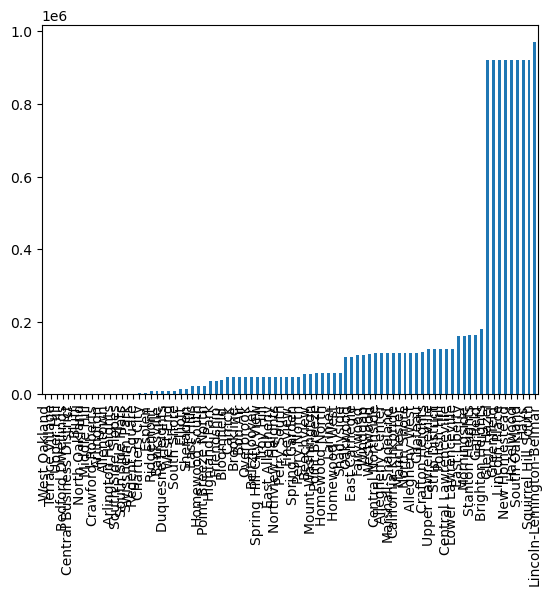

In [45]:
nghpolSorted.plot.bar()

Looks like there are some groups.
0 - 60k
100k - 180k
920k+